In [1]:
library('car')
library('lme4')
library('tidyr')
library('ggplot2')

Loading required package: carData
Loading required package: Matrix
Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 

Attaching package: ‘tidyr’

The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack



In [2]:
df <- read.csv('../data/processed/mean_resp_similarity.csv')
df$catch <- as.logical(df$catch)
head(df)

mouse_id,day,cell_type,cell_uid,catch,first_day,tone,tone...delay,reward
CL174,day_1,pyr,CL174_pyr_0,FALSE,day_1,0.30052319,0.08075771,0.45192675
CL174,day_1,pyr,CL174_pyr_1,FALSE,day_1,-0.10860173,-0.29872198,-0.10106070
CL174,day_1,pyr,CL174_pyr_2,FALSE,day_1,0.45159754,0.40537377,0.25199691
CL174,day_1,pyr,CL174_pyr_3,FALSE,day_1,-0.16785598,-0.09559496,-0.09038131
CL174,day_1,pyr,CL174_pyr_4,FALSE,day_1,-0.09402035,-0.24937449,-0.65156446
CL174,day_1,pyr,CL174_pyr_5,FALSE,day_1,-0.17269875,-0.36149249,-0.47007276


In [3]:
cell_types <- unique(df$cell_type)
days <- c("day_1", "day_7")

for (condition in c("tone", "reward", "tone...delay")) {
    print(condition)
    for (cell_type in cell_types) {
        for (day in days) {
            cat(cell_type, day, '\n')
            df[(df$cell_type == cell_type) & (df$day == day), c('cell_uid', 'catch', condition[1])] %>% 
              pivot_wider('cell_uid', names_from='catch', values_from=condition[1]) -> paired.obs
            wilcox.result <- wilcox.test(paired.obs[, "FALSE"][[1]], paired.obs[, "TRUE"][[1]], paired=TRUE)
            corrected.p.val <- wilcox.result$p.val * length(cell_types) * length(days)

            if (corrected.p.val < 0.05) {
                cat(
                    'Raw p-value: ', wilcox.result$p.val, 
                    ', after Bonferroni correction: ', 
                    corrected.p.val, '*',
                    sep="", 
                    fill=90
                )
            } else {
                cat(
                    'Raw p-value: ', wilcox.result$p.val, 
                    ', after Bonferroni correction: ', 
                    corrected.p.val,
                    sep="", 
                    fill=90
                )
            }
            cat('\n')
        }
        cat('\n')
    }
}


[1] "tone"
pyr day_1 
Raw p-value: 0.001383381, after Bonferroni correction: 0.01106705*

pyr day_7 
Raw p-value: 3.528794e-17, after Bonferroni correction: 2.823035e-16*


som day_1 
Raw p-value: 7.211106e-11, after Bonferroni correction: 5.768885e-10*

som day_7 
Raw p-value: 0.0007202519, after Bonferroni correction: 0.005762015*


pv day_1 
Raw p-value: 5.626834e-16, after Bonferroni correction: 4.501467e-15*

pv day_7 
Raw p-value: 0.001563884, after Bonferroni correction: 0.01251107*


vip day_1 
Raw p-value: 0.6246586, after Bonferroni correction: 4.997269

vip day_7 
Raw p-value: 7.739134e-08, after Bonferroni correction: 6.191308e-07*


[1] "reward"
pyr day_1 
Raw p-value: 0.09398656, after Bonferroni correction: 0.7518925

pyr day_7 
Raw p-value: 4.451549e-09, after Bonferroni correction: 3.561239e-08*


som day_1 
Raw p-value: 4.437882e-05, after Bonferroni correction: 0.0003550306*

som day_7 
Raw p-value: 1.829626e-18, after Bonferroni correction: 1.463701e-17*


pv day_1 

Warning message:
“Removed 43 rows containing missing values (geom_violin).”

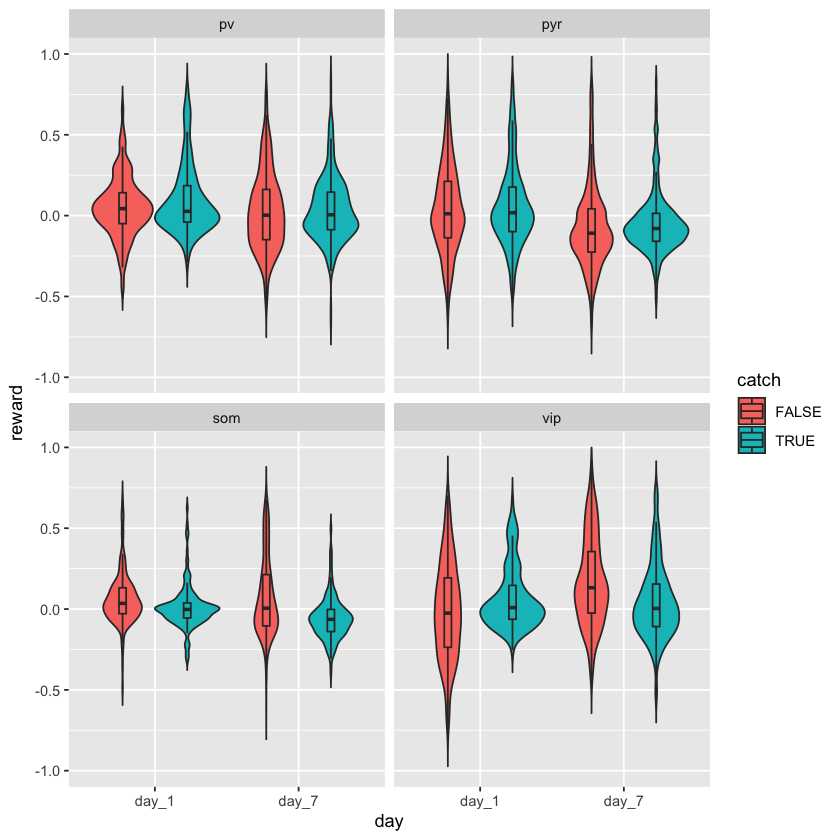

In [4]:
p <- ggplot(df[df$day %in% days, ], aes(x=day, y=reward, fill=catch)) +
    geom_violin(trim=FALSE) +
    geom_boxplot(width=0.1, outlier.alpha=0, position=position_dodge(width=0.9)) +
    facet_wrap(~ cell_type) +
    ylim(-1, 1)
p

Warning message:
“Removed 9 rows containing missing values (geom_violin).”

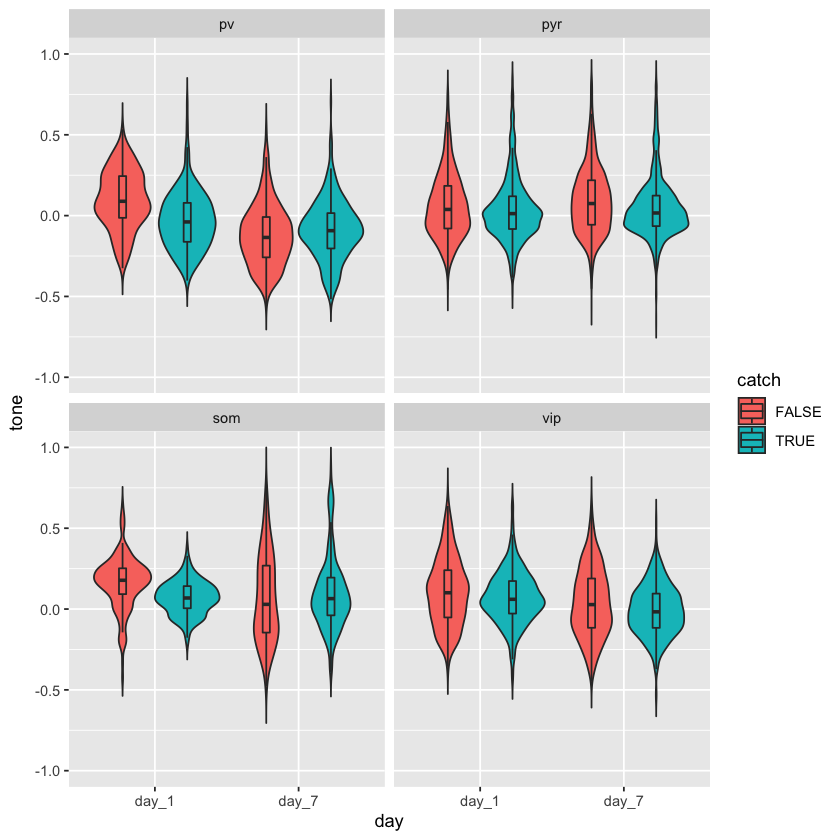

In [5]:
p <- ggplot(df[df$day %in% days, ], aes(x=day, y=tone, fill=catch)) +
    geom_violin(trim=FALSE) +
    geom_boxplot(width=0.1, outlier.alpha=0, position=position_dodge(width=0.9)) +
    facet_wrap(~ cell_type) +
    ylim(-1, 1)
p

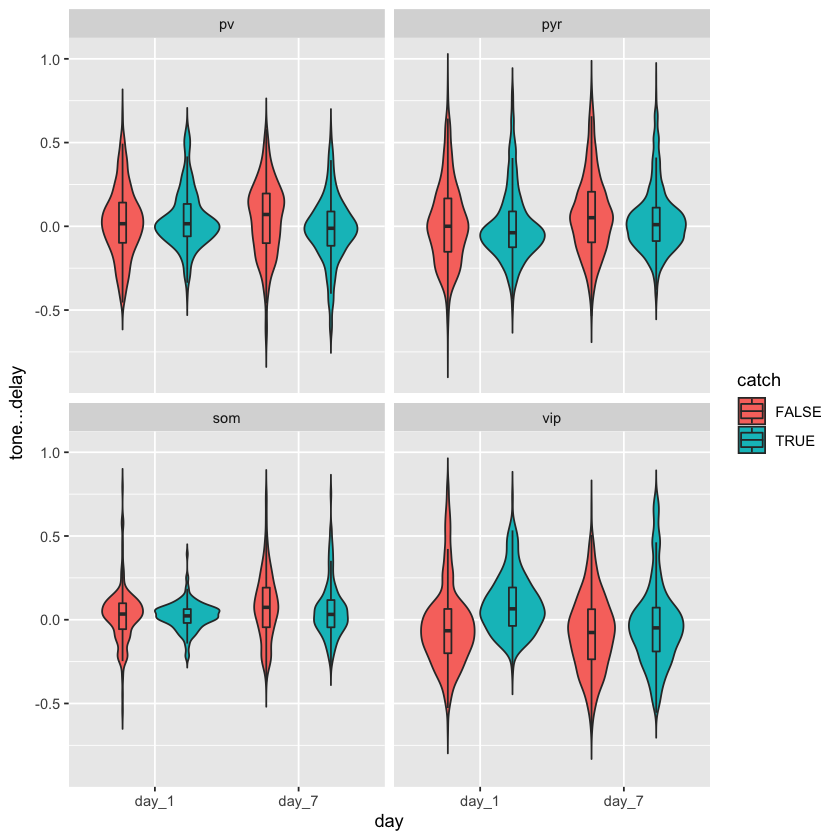

In [6]:
p <- ggplot(df[df$day %in% days, ], aes(x=day, y=tone...delay, fill=catch)) +
    geom_violin(trim=FALSE) +
    geom_boxplot(width=0.1, outlier.alpha=0, position=position_dodge(width=0.9)) +
    facet_wrap(~ cell_type)
p